# Bike Store Sale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#creo DataFrame sales
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date'])
sales.head(3)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401


## Statistiche

In [3]:
#media di Customer_Age
sales['Customer_Age'].mean() 

#media di Order_Quantity
sales['Order_Quantity'].mean() 

#numero di vendite raggruppate per Year
sales['Year'].value_counts()

#numero di vendite raggruppate per Year, Mese
sales[['Year', 'Month']].value_counts()

#numero di vendite maggiore raggruppate per Country
sales['Country'].value_counts().head(1)

#lista di prodotti differenti
sales['Product'].unique()

#aggiungo il nuovo campo Calculated_Date al DataFrame sales e lo trasformo in un datetime object
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x.iloc[0], x.iloc[1], x.iloc[2]), axis=1)
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

#aumento il valore del campo Revenue di 50
#sales['Revenue'] += 50

#numero di vendite in Canada ed in France
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')]['Country'].shape[0]

#numero di vendite in Canada con Sub_Category uguale a 'Bike Racks'
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

#numero di vendite in France divisi per State
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()
#print(france_states)

#numero di vendite raggruppate per Product_Category
sales['Product_Category'].value_counts()

#numero di vendite per la Product_Category = 'Accessories' raggruppate per per Sub_Category
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()
#print(accessories)

#numero di vendite per la Product_Category = 'Bikes' raggruppate per per Sub_Category
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()
#print(bikes)

#numero di vendite per Customer_Gender = 'M' e Revenue >= 500 
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] >= 500)].shape[0]

#top 5 sales con Revenue piu alta
sales.sort_values(['Revenue'], ascending=False).head(5)

#top 1 sales con Revenue piu alta
sales.loc[sales['Revenue'] == sales['Revenue'].max()]

#media di Order_Quantity per ordini con Revenue >= 10_000
sales.loc[(sales['Revenue'] >= 10_000)]['Order_Quantity'].mean()

#numero ordini in May del 2016
sales.loc[(sales['Year'] == 2016) & (sales['Month'] == 'May')].shape[0]

#numero ordini tra May e July del 2016  
sales.loc[(sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))].shape[0]

#cambio il tipo della colonna Unit_Price a float
sales['Unit_Price'] = sales['Unit_Price'].astype(float)

#aggiungo una tassa del 7.2% all campo Unit_Price
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072



## Grafici

Ellipsis

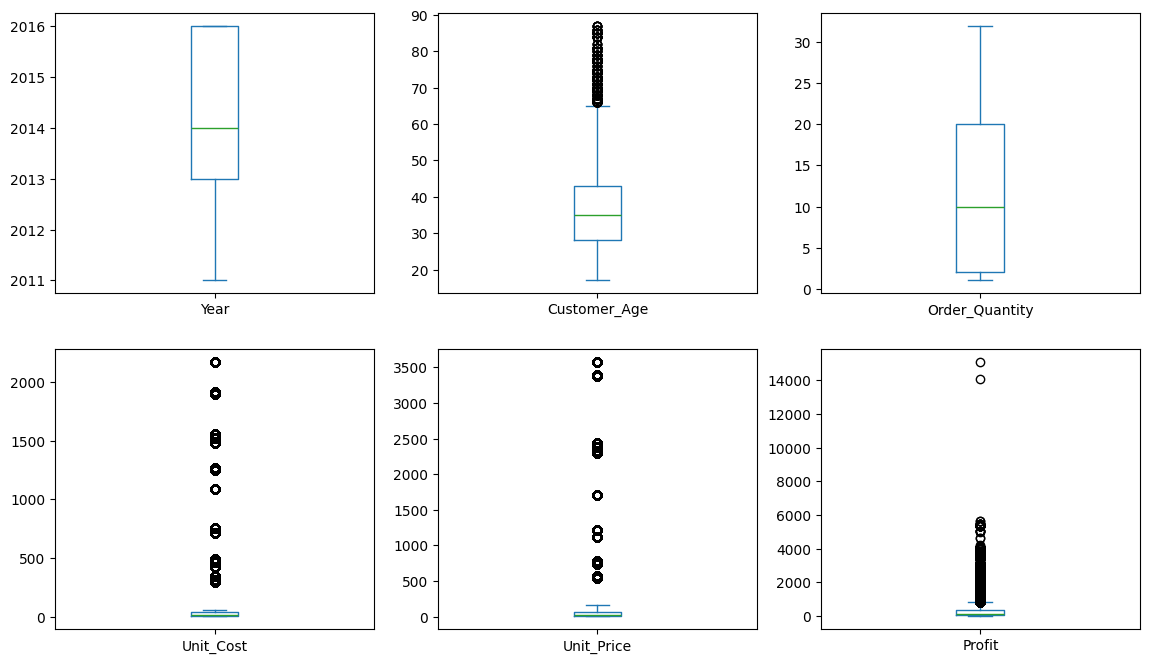

In [4]:
#grafico a densita che mostra la Customer_Age
#sales['Customer_Age'].plot(kind='kde', figsize=(14,6)) 

#grafico a scatola che mostra la Customer_Age evidenziando mediana, quartili e outlier
#sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

#grafico a barre che mostra il numero di Order_Quantity in basa alla sua frequenza
#sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

#grafico a scatola che mostra il numero di Order_Quantity evidenziando mediana e quartili
#sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

#grafico a torta che mostra il numero di vendite raggruppate per Year
#sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

#grafico a barre che mostra il numero di vendite raggruppate per Year, Month
#sales[['Year','Month']].value_counts().plot(kind='bar', figsize=(14,6))

#grafico a barre che mostra il numero di vendite raggruppate per Country
#sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

#top 10 prodotti venduti
#sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

#relazione tra Unit_Cost e Unit_Price
#sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

#relazione tra Order_Quantity e Profit
#sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

#relazione tra i Profit nelle varie Country
#sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

#relazione tra la Customer_Age nelle varie Country
#sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

#grafico a linee che mostra il numero di vendite in base alla Calculated_Date
#sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

#grafico a barre che mostra il numero di vendite in France divisi per State
#france_states.plot(kind='bar', figsize=(14,6))

#grafico a torta che mostra il numero di vendite raggruppate per Product_Category
#sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

#grafico a barre che mostra il numero di vendite per la Product_Category = 'Accessories' raggruppate per per Sub_Category
#accessories.plot(kind='bar', figsize=(14,6))

#grafico a torta che mostra il numero di vendite per la Product_Category = 'Bikes' raggruppate per per Sub_Category
#bikes.plot(kind='pie', figsize=(6,6))

#grafico a scatola che mostra i Profit del 2016 divisi per Month
#profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]
#profit_2016.boxplot(by='Month', figsize=(14,6))

#grafico a densita che mostra il Unit_Cost in base al nemero di vendite mostrano la media e mediana
#ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6), color='blue')
#ax.axvline(sales['Unit_Cost'].mean(), color='red')
#ax.axvline(sales['Unit_Cost'].median(), color='green')

#grafico a barre che mostra il Unit_Cost in base al nemero di vendite
#ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
#ax.set_ylabel('Number of Sales')
#ax.set_xlabel('dollars')

#grafico che mostra le relazioni tra le varie colonne numeriche (blu = alta correlazione, rosso scuro = correlazione negativa)
#corr = sales.select_dtypes(include=['number']).corr()
#fig = plt.figure(figsize=(8,8))
#plt.matshow(corr, cmap='RdBu', fignum=fig.number)
#plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
#plt.yticks(range(len(corr.columns)), corr.columns)

#multi grafico a scatola che mostra le vendite in base a vari parametri
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']
sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))


...